# Framingham Heart Study Dataset
___

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
#for graphs and data visualization
import seaborn as sns             
import matplotlib.pyplot as plt
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import StandardScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier
import pickle

## Loading and Previewing the Dataset

In [3]:
framingham = pd.read_csv('framingham.csv')
framingham.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Data Preprocessing

In [5]:
#Finding how many unique values are in the dataset
framingham.nunique()

gender                2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [8]:
# Convert columns to the correct data type
framingham['gender'] = framingham['gender'].astype('category')
framingham['education'] = framingham['education'].astype('category')
framingham['currentSmoker'] = framingham['currentSmoker'].astype('category')
framingham['BPMeds'] = framingham['BPMeds'].astype('category')
framingham['prevalentStroke'] = framingham['prevalentStroke'].astype('category')
framingham['prevalentHyp'] = framingham['prevalentHyp'].astype('category')
framingham['diabetes'] = framingham['diabetes'].astype('category')
framingham['TenYearCHD'] = framingham['TenYearCHD'].astype('category')


# Check the data types again after conversion
framingham.dtypes


gender             category
age                   int64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

In [9]:
# Rename the column to 'gender'
framingham = framingham.rename(columns={'male': 'gender'})

### Data Preperation(Data Cleaning)
- Check missing values
- Fill null values

### Checking Missing Values

In [10]:
framingham.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
print((framingham["glucose"].mode())[0])

75.0


In [24]:
framingham["glucose"] = framingham["glucose"].fillna(framingham["glucose"].mode()[0])

- Filling the missing spaces of glucosecolumn with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [25]:
framingham.dropna(inplace=True)
framingham.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

- Dropping all other rows containing missing values

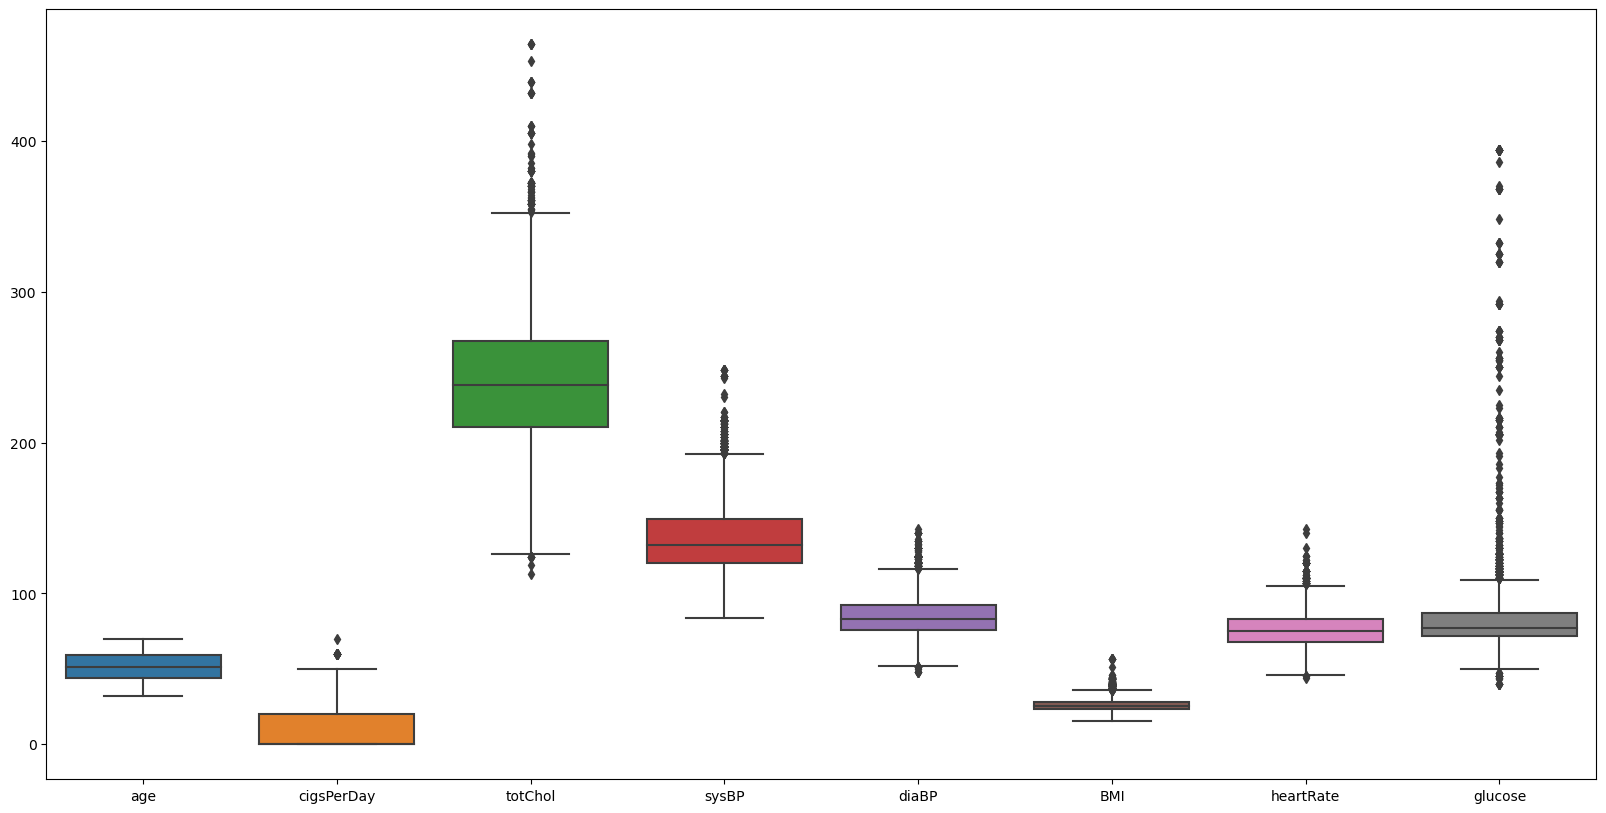

In [26]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=framingham)
plt.show()

- Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.

In [27]:
framingham['totChol'].max()

464.0

In [28]:
framingham['sysBP'].max()

248.0

In [29]:
framingham = framingham[framingham['totChol']<600.0]
framingham = framingham[framingham['sysBP']<295.0]
framingham.shape

(6788, 16)

### Resampling imbalanced dataset by oversampling positive cases

In [30]:
target1=framingham[framingham['TenYearCHD']==1]
target0=framingham[framingham['TenYearCHD']==0]

In [31]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [32]:
target=pd.concat([target0,target1])

In [33]:
target['TenYearCHD'].value_counts()

TenYearCHD
0    3394
1    3394
Name: count, dtype: int64

In [34]:
framingham=target
np.shape(framingham)

(6788, 16)

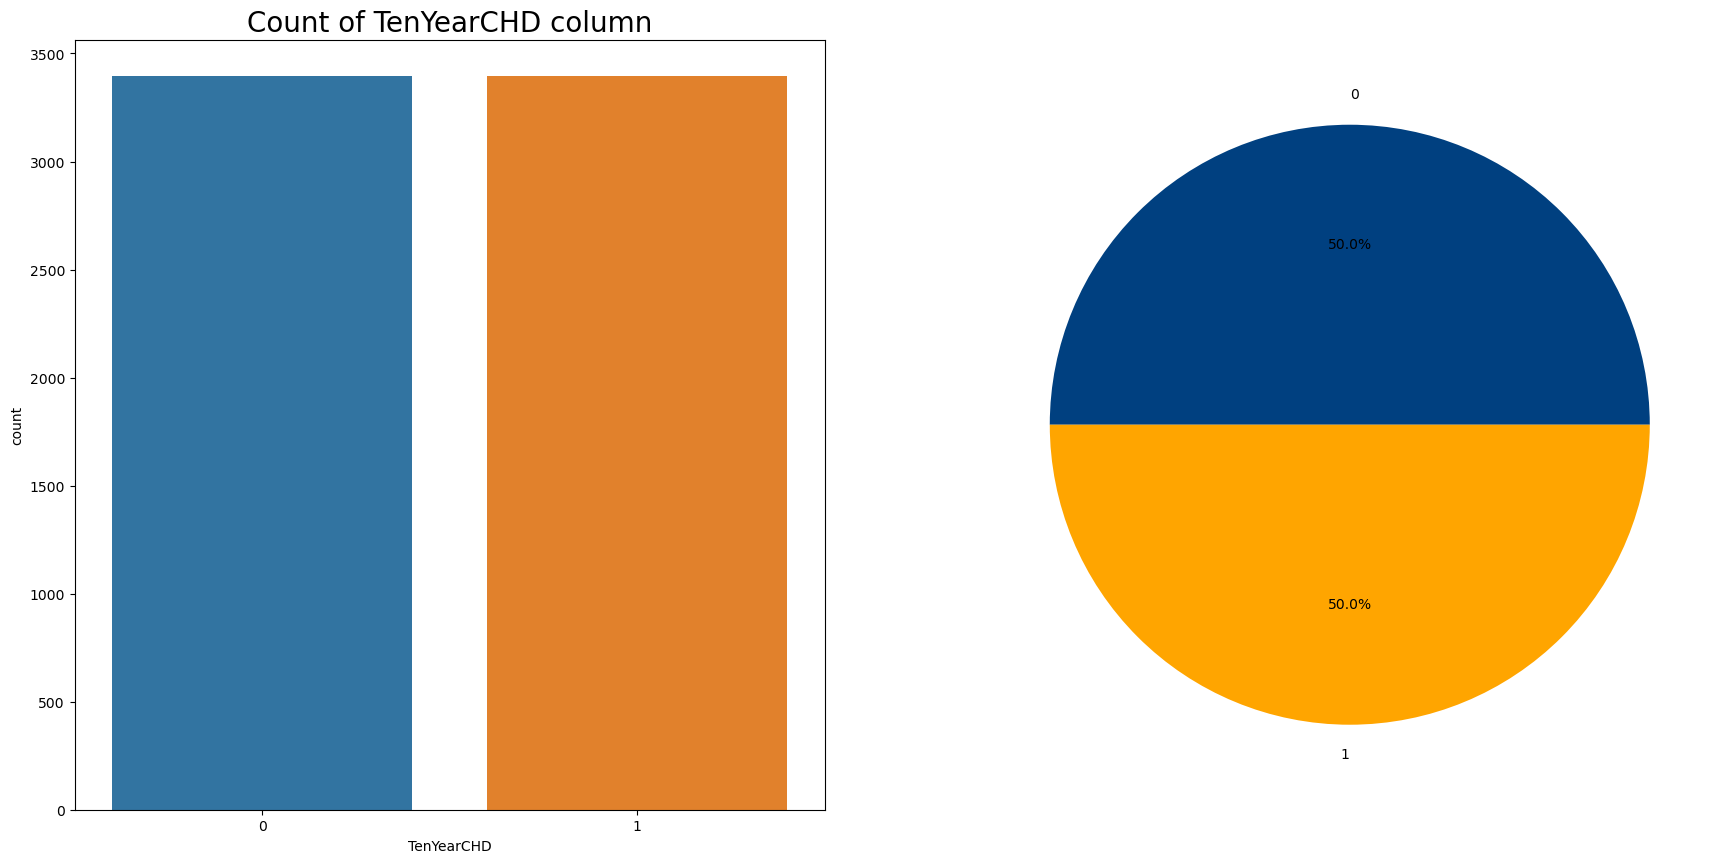

In [35]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=framingham)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(framingham["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["#004080","#FFA500"])
plt.show()

## Exploratory Data Analysis

### Statistical Summary

In [36]:
statistical_summary = framingham.describe()
statistical_summary

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000,6788.000000
mean,51.389364,9.940189,240.975840,137.152033,84.850029,26.052817,76.252799,84.235121
std,8.596105,12.685098,45.069287,25.242528,13.238951,4.192413,12.062605,31.495720
min,32.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,44.000000,0.000000,210.000000,119.500000,76.000000,23.177500,68.000000,72.000000
50%,51.000000,1.000000,239.000000,132.000000,83.000000,25.750000,75.000000,77.000000
75%,59.000000,20.000000,269.000000,150.000000,92.000000,28.350000,84.000000,87.000000
max,70.000000,70.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000


### Correlation Matrix

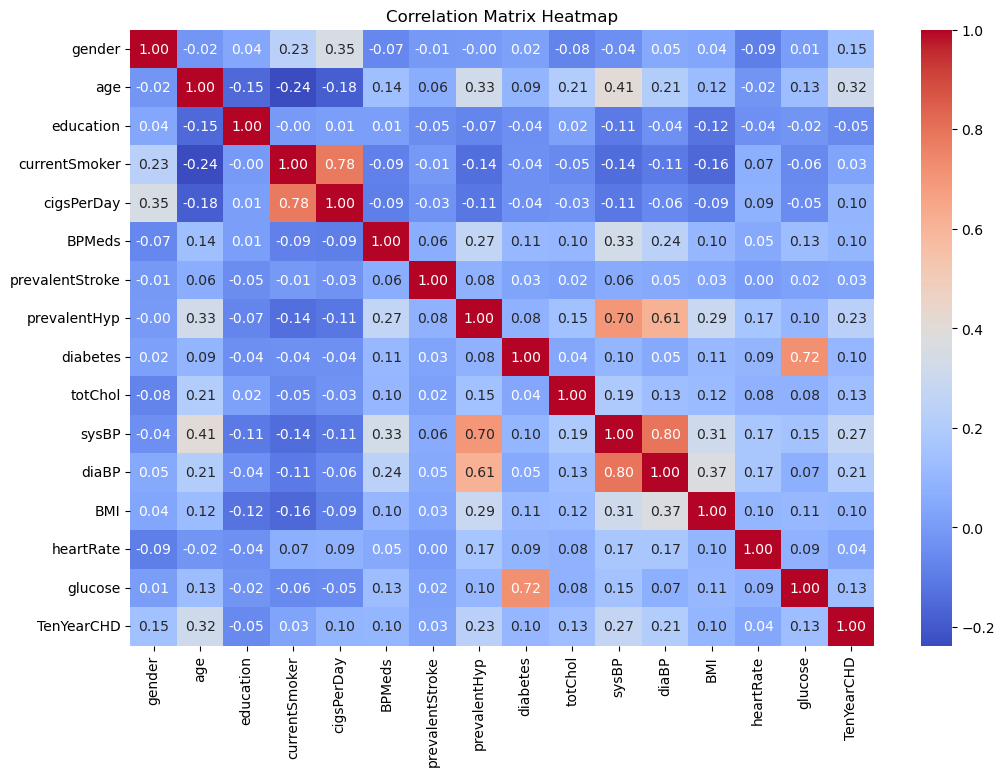

In [37]:
correlation_matrix = framingham.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Selection

In [38]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=framingham.iloc[:,0:15]
y=framingham.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6788, 15) 
y -  (6788,)


In [39]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [40]:
fit=best.fit(X,y)

In [41]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [42]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  2372.445197
14       glucose  1356.486145
4     cigsPerDay  1002.861487
1            age   988.892412
9        totChol   980.497134
11         diaBP   592.874948
7   prevalentHyp   227.079395
0         gender    77.165763
8       diabetes    67.503759
5         BPMeds    66.216216
12           BMI    42.951746


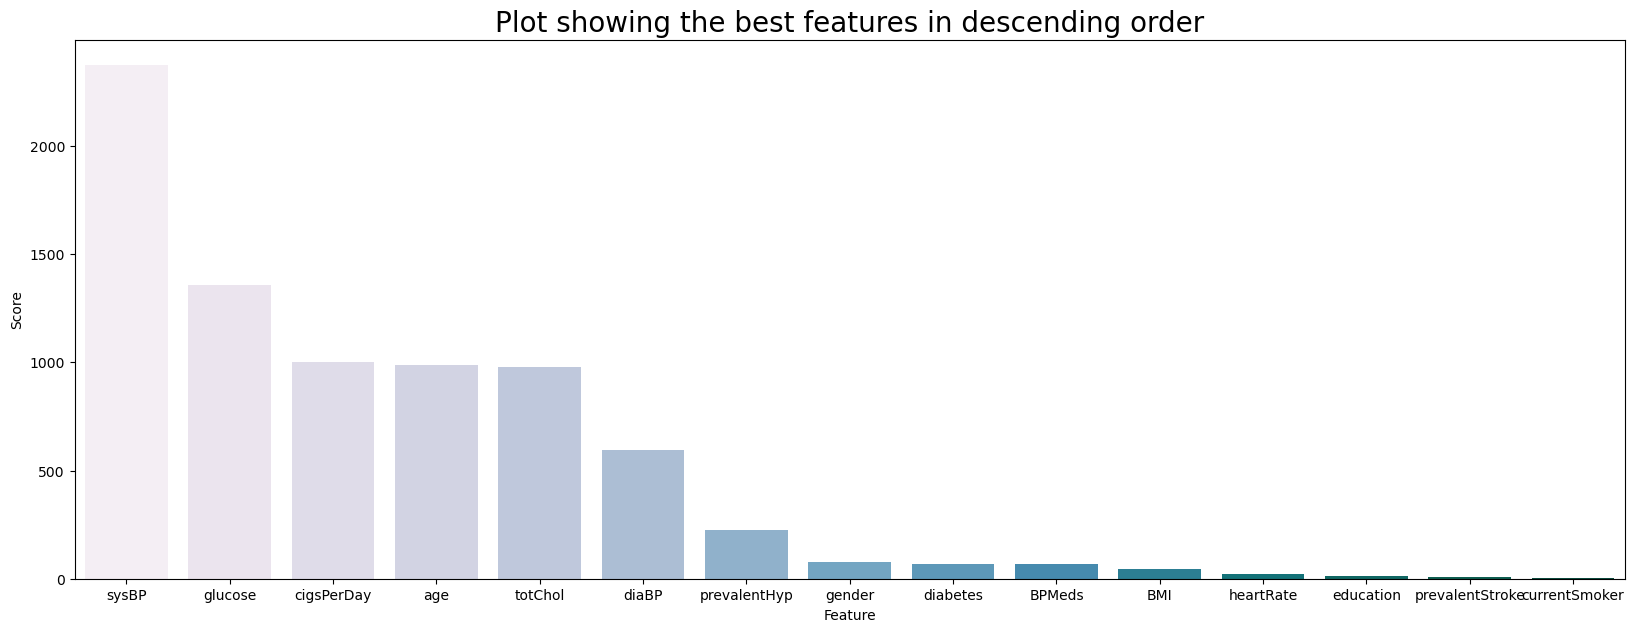

In [44]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='PuBuGn')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

- This plot shows the Features and their respective chi-square test scores

In [45]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'cigsPerDay',
 'age',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'gender',
 'diabetes',
 'BPMeds']

Only these features have the strongest influence over the target variable. They are, in particular order:

- sysBP
- glucose
- age
- cigsPerDay
- totChol
- diaBP
- prevalentHyp
- gender
- BPMeds
- diabetes


In [46]:
framingham=framingham[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','gender','BPMeds','diabetes','TenYearCHD']]
framingham.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,gender,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0


In [47]:
# Assuming 'df' is your cleaned DataFrame
framingham.to_csv('cleaned_framingham.csv', index=False)


## Feature and Label Split

In [48]:
y = framingham['TenYearCHD']
X = framingham.drop(['TenYearCHD'], axis=1)

### Splitting Dataset into Training and Test Sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5430, 10), (1358, 10), (5430,), (1358,))

## Model Training and Evaluation

### Predictive Modeling


We use the following different machine learning models for the dataset:

1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gradient Boosting Classifier


In [51]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[458 237]
 [237 426]]


Accuracy of Logistic Regression: 65.09572901325478 

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       695
           1       0.64      0.64      0.64       663

    accuracy                           0.65      1358
   macro avg       0.65      0.65      0.65      1358
weighted avg       0.65      0.65      0.65      1358



In [52]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predict))

confussion matrix
[[580 115]
 [ 11 652]]


Accuracy of k-NN Classification: 90.72164948453609 

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       695
           1       0.85      0.98      0.91       663

    accuracy                           0.91      1358
   macro avg       0.92      0.91      0.91      1358
weighted avg       0.92      0.91      0.91      1358



In [53]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[598  97]
 [ 19 644]]


Accuracy of Random Forest: 91.4580265095729 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       695
           1       0.87      0.97      0.92       663

    accuracy                           0.91      1358
   macro avg       0.92      0.92      0.91      1358
weighted avg       0.92      0.91      0.91      1358



In [54]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[583 112]
 [ 10 653]]


Accuracy of DecisionTreeClassifier: 91.01620029455081 

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       695
           1       0.85      0.98      0.91       663

    accuracy                           0.91      1358
   macro avg       0.92      0.91      0.91      1358
weighted avg       0.92      0.91      0.91      1358



In [55]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(X_train, y_train)
gvc_predicted = gvc.predict(X_test)
gvc_conf_matrix = confusion_matrix(y_test, gvc_predicted)
gvc_acc_score = accuracy_score(y_test, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(y_test,gvc_predicted))

confussion matrix
[[479 216]
 [174 489]]


Accuracy of Gradient Boosting Classifier: 71.28129602356407 

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       695
           1       0.69      0.74      0.71       663

    accuracy                           0.71      1358
   macro avg       0.71      0.71      0.71      1358
weighted avg       0.71      0.71      0.71      1358



## Hyperparameter Tuning for best Classifier

Using Randomized Search Cross Validation

### Random Forest Classifier

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)




{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [88]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=0, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7)

In [89]:
#rf_hyper = rf_random.best_estimator_
rf_hyper = RandomForestClassifier(**rf_random.best_params_)
rf_hyper.fit(X_train, y_train)
print("Accuracy on training set is : {}".format(rf_hyper.score(X_train, y_train)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(X_test, y_test)))
rf_predicted = rf_hyper.predict(X_test)
rf_acc_score = accuracy_score(y_test,rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(y_test, rf_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9771723122238586
Accuracy of Hyper-tuned Random Forest Classifier: 97.71723122238586 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       670
           1       0.97      0.99      0.98       688

    accuracy                           0.98      1358
   macro avg       0.98      0.98      0.98      1358
weighted avg       0.98      0.98      0.98      1358



### Gradient Boosting Classifier


In [90]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['sqrt', 'log2', None]
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [91]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=0, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, return_train_score=True, scoring='f1')

In [92]:
#gb_hyper = gb_random.best_estimator_
gb_hyper = GradientBoostingClassifier(**gb_random.best_params_)
gb_hyper.fit(X_train,y_train)
print("Accuracy on training set is : {}".format(gb_hyper.score(X_train,y_train)))
print("Accuracy on validation set is : {}".format(gb_hyper.score(X_test,y_test)))
gbc_predicted = gb_hyper.predict(X_test)
gbc_acc_score = accuracy_score(y_test, gbc_predicted)
print("Accuracy of Hyper-tuned Gradient Boosting Classifier:",gbc_acc_score*100,'\n')
print(classification_report(y_test, gbc_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9690721649484536
Accuracy of Hyper-tuned Gradient Boosting Classifier: 96.90721649484536 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       670
           1       0.95      0.99      0.97       688

    accuracy                           0.97      1358
   macro avg       0.97      0.97      0.97      1358
weighted avg       0.97      0.97      0.97      1358



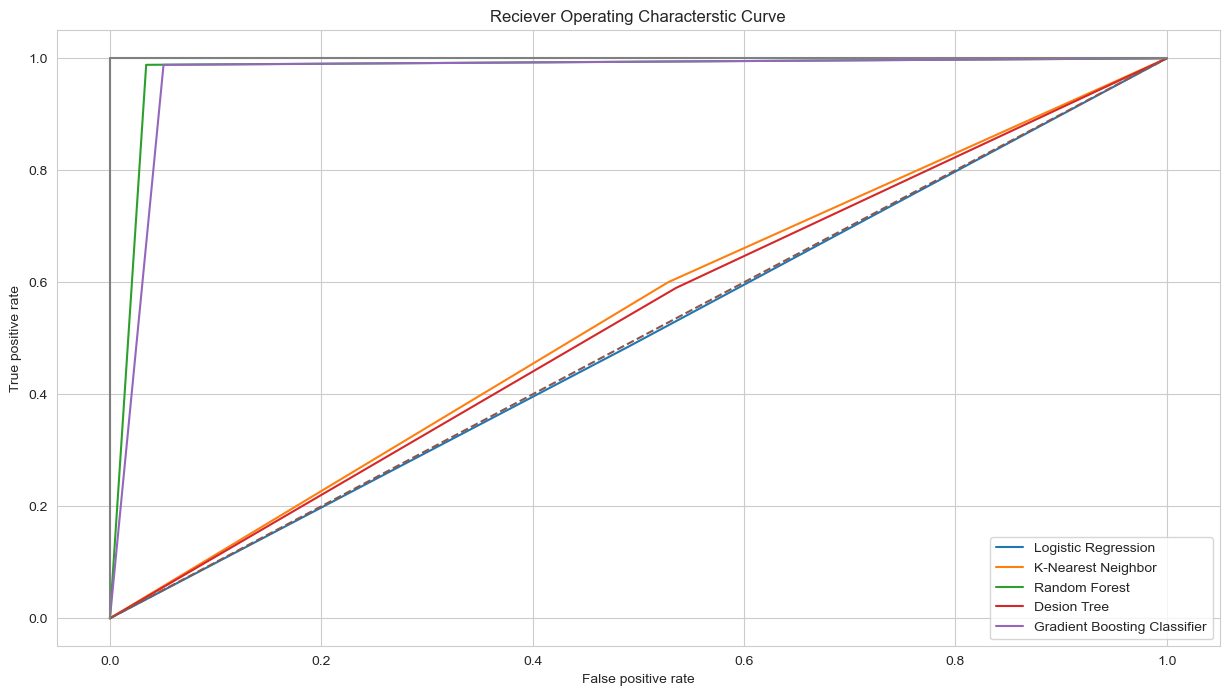

In [93]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(y_test,gbc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### Model Evaluation


In [94]:
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Random Forest',
              'Decision Tree', 'Gradient Boosting'],
    'Accuracy': [lr_acc_score*100, knn_acc_score*100, rf_acc_score*100, 
                 dt_acc_score*100, gbc_acc_score*100]
})
model_ev

,Model,Accuracy
0,Logistic Regression,65.095729
1,K-Nearest Neighbour,90.721649
2,Random Forest,97.717231
3,Decision Tree,91.016200
4,Gradient Boosting,96.907216


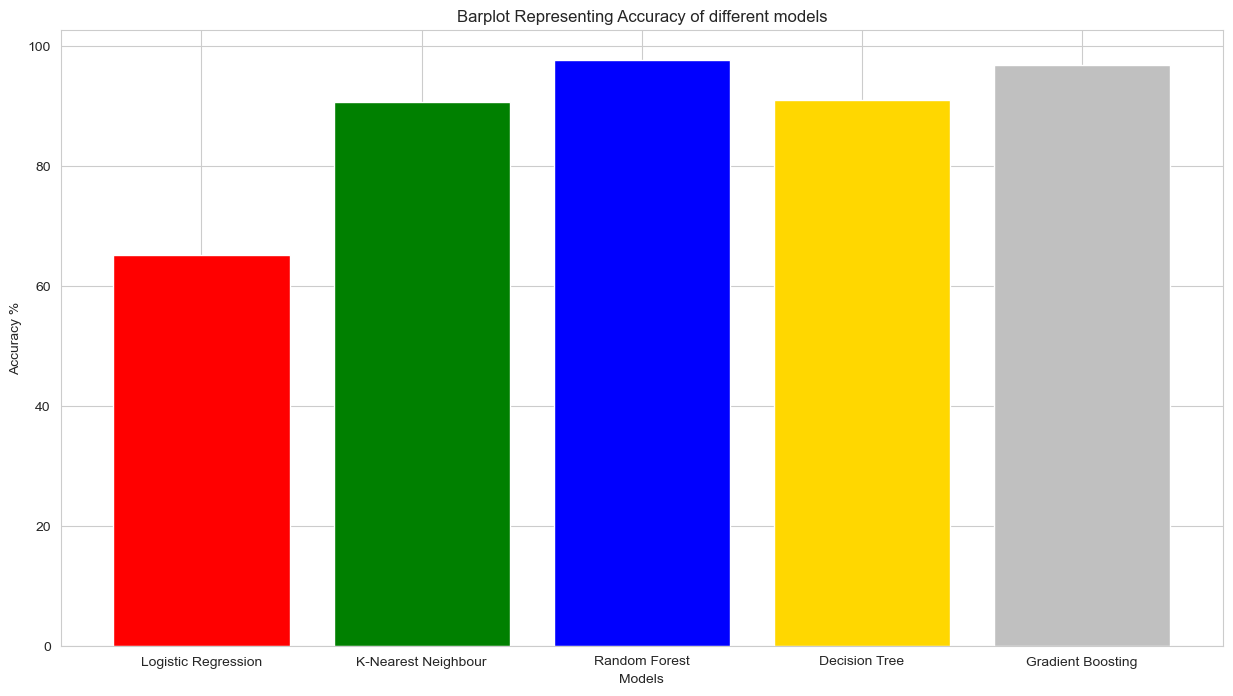

In [95]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

### Ensembling


In order to increase the accuracy of the model we use ensembling. Here we use stacking technique. We stack the 4 highest accuracy yielding models to create an ensembled model.

In [99]:
scv=StackingCVClassifier(classifiers=[rf_hyper, gb_hyper, knn, dt], meta_classifier= rf)
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scv.fit(X_train.values,y_train.values)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))





/Users/snowdrop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/snowdrop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/Users/snowdrop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/snowdrop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


confussion matrix
[[645  25]
 [  8 680]]


Accuracy of StackingCVClassifier: 97.5699558173785 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       670
           1       0.96      0.99      0.98       688

    accuracy                           0.98      1358
   macro avg       0.98      0.98      0.98      1358
weighted avg       0.98      0.98      0.98      1358



## Conclusion

In [97]:
# Create a new DataFrame for the row to be appended
new_row = pd.DataFrame({'Model': ['Stacking Ensemble'], 'Accuracy': [scv_acc_score*100]})

model_ev = pd.concat([model_ev, new_row], ignore_index=True)

model_ev

,Model,Accuracy
0,Logistic Regression,65.095729
1,K-Nearest Neighbour,90.721649
2,Random Forest,97.717231
3,Decision Tree,91.016200
4,Gradient Boosting,96.907216
5,Stacking Ensemble,97.422680


In [98]:
# Serialize the model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_hyper, file)

print("Model has been saved as random_forest_model.pkl")

Model has been saved as random_forest_model.pkl


## Streamlit App

We build a model that aims to predict the risk of coronary heart disease (CHD) in individuals over the next ten years based on a range of health indicators and lifestyle factors. By analyzing inputs like blood pressure, cholesterol levels, and smoking habits, the model helps in identifying individuals at higher risk, facilitating early intervention and preventive healthcare measures.


Streamlit App
https://coronary-risk.streamlit.app